In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import Model
from keras.models import load_model
import tensorflow.keras.utils
import tensorflow.keras.metrics

from Poisson_modeling import Poisson_modeling
from functions import plotter

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer 
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline

In [2]:
tf.metrics.RootMeanSquaredError

keras.metrics.metrics.RootMeanSquaredError

In [3]:
p_mod = Poisson_modeling()

In [4]:
est_list = [PoissonRegressor(max_iter=300),
            RandomForestRegressor(criterion='poisson'),
            HistGradientBoostingRegressor(loss='poisson')]
scaler_list = [None,
               StandardScaler(), 
                  MinMaxScaler(),
                  MaxAbsScaler(),
                  RobustScaler(),
                  PowerTransformer(),
                  QuantileTransformer(),
                  Normalizer()]
results_dict = dict()

for i in est_list:
    for e in scaler_list:
        p_mod.pipeline_creator(
                        input_est=i,
                        input_scaler=e,
                        test_train=False)

# time: 1m 47s


**************************
est type: PoissonRegressor(max_iter=300)
scaler type: None
Test_train: False
***
explained_variance:  0.0
RMSE:  0.6706
mean poisson_deviance 1 4
***
mean_squared_log_error:  0.1095
r2:  0.0
MAE:  0.3664
MSE:  0.4497
Median absolute error:  0.2121
**************************
est type: PoissonRegressor(max_iter=300)
scaler type: StandardScaler()
Test_train: False
***
explained_variance:  0.0295
RMSE:  0.6606
mean poisson_deviance 1 4
***
mean_squared_log_error:  0.1043
r2:  0.0295
MAE:  0.3584
MSE:  0.4364
Median absolute error:  0.1995
**************************
est type: PoissonRegressor(max_iter=300)
scaler type: MinMaxScaler()
Test_train: False
***
explained_variance:  0.0067
RMSE:  0.6683
mean poisson_deviance 1 4
***
mean_squared_log_error:  0.1083
r2:  0.0067
MAE:  0.3647
MSE:  0.4466
Median absolute error:  0.2094
**************************
est type: PoissonRegressor(max_iter=300)
scaler type: MaxAbsScaler()
Test_train: False
***
explained_variance:  0.

**************************
est type: PoissonRegressor(max_iter=300)
scaler type: StandardScaler()
Test_train: True
explained_variance:  0.0241
RMSE:  0.644
mean poisson_deviance 1 4
***
mean_squared_log_error:  0.0999
r2:  0.0233
MAE:  0.3496
MSE:  0.4148
Median absolute error:  0.201
****
**************************
est type: HistGradientBoostingRegressor(loss='poisson')
scaler type: None
Test_train: True
explained_variance:  0.1228
RMSE:  0.6104
mean poisson_deviance 1 4
***
mean_squared_log_error:  0.0899
r2:  0.1227
MAE:  0.292
MSE:  0.3726
Median absolute error:  0.1128
**************************
est type: RandomForestRegressor(criterion='poisson')
scaler type: None
Test_train: True
explained_variance:  0.0153
RMSE:  0.6472
mean poisson_deviance 1 4
***
mean_squared_log_error:  0.1041
r2:  0.0138
MAE:  0.3078
MSE:  0.4188
Median absolute error:  0.0977


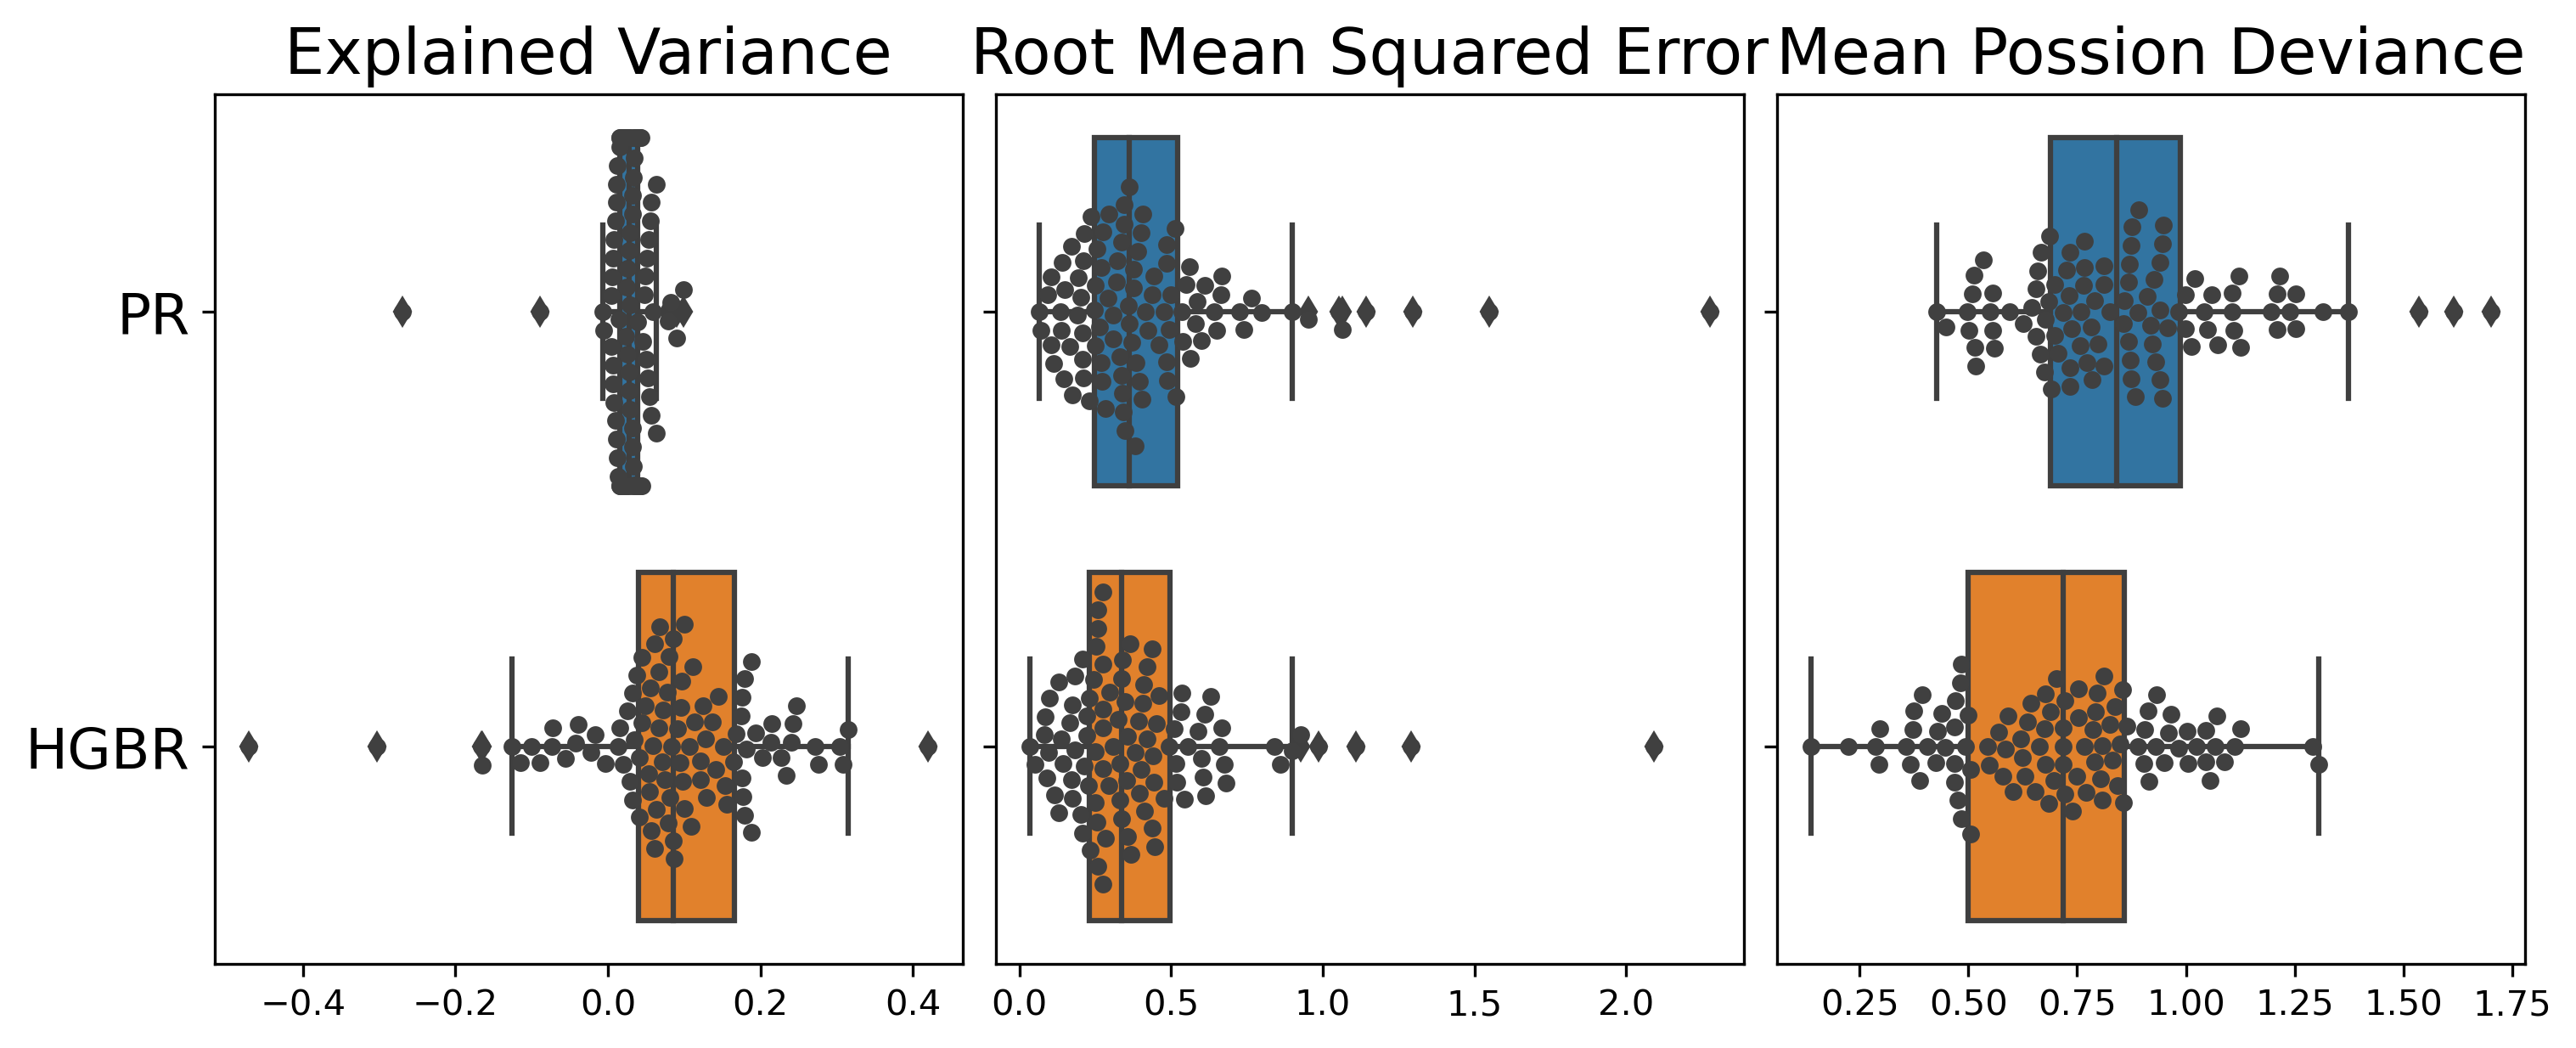

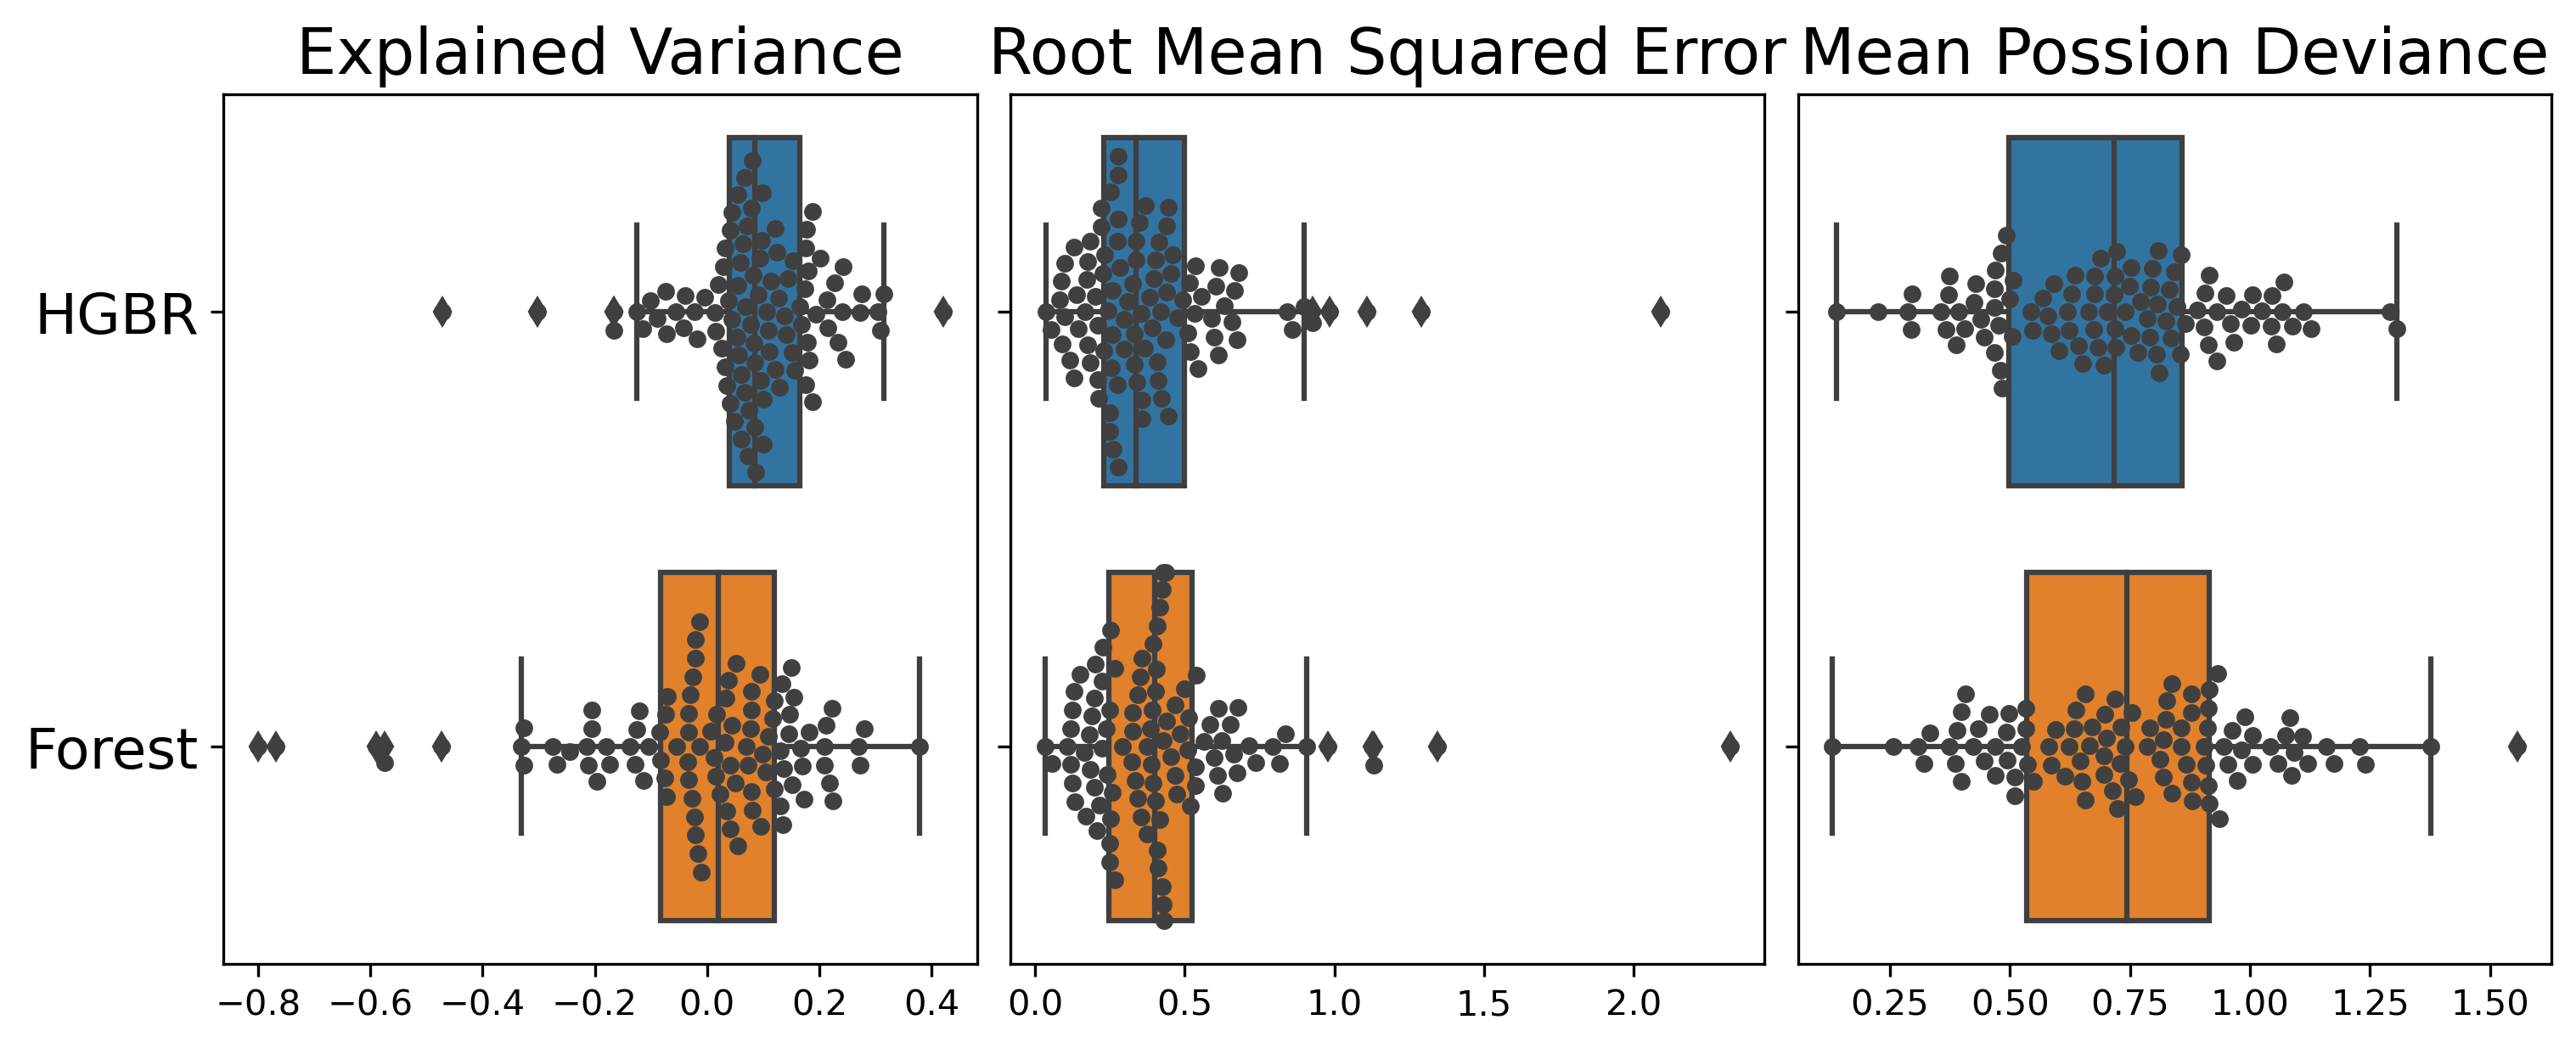

In [5]:
p_mod = Poisson_modeling()
# X = p_mod.X
pipe = p_mod.pipeline_creator(input_est=PoissonRegressor(max_iter=300),input_scaler=StandardScaler())
y_pred = pipe.predict(p_mod.X)
print('****')

# X = p_mod.X
# y=p_mod.y
# p_mod.regression_results(y=p_mod.y, y_pred=y_pred)
pr_results = p_mod.evaluate_model(pipe,model='PR',n_jobs=8)

pipe2 = p_mod.pipeline_creator(
    input_est=HistGradientBoostingRegressor(loss='poisson'),
    input_scaler= None) 
HGBR_res = p_mod.evaluate_model(pipe2,model='HGBR',n_jobs=8)

pipe3 = p_mod.pipeline_creator(
    input_est=RandomForestRegressor(criterion='poisson'),
    input_scaler= None) 
forest_res = p_mod.evaluate_model(pipe3,model='Forest',n_jobs=8)

# p_mod.plot_results(pr_results,HGBR_res)
# plt.show()

# p_mod.plot_results(HGBR_res,forest_res)
# plt.show()
# time 2m 20s

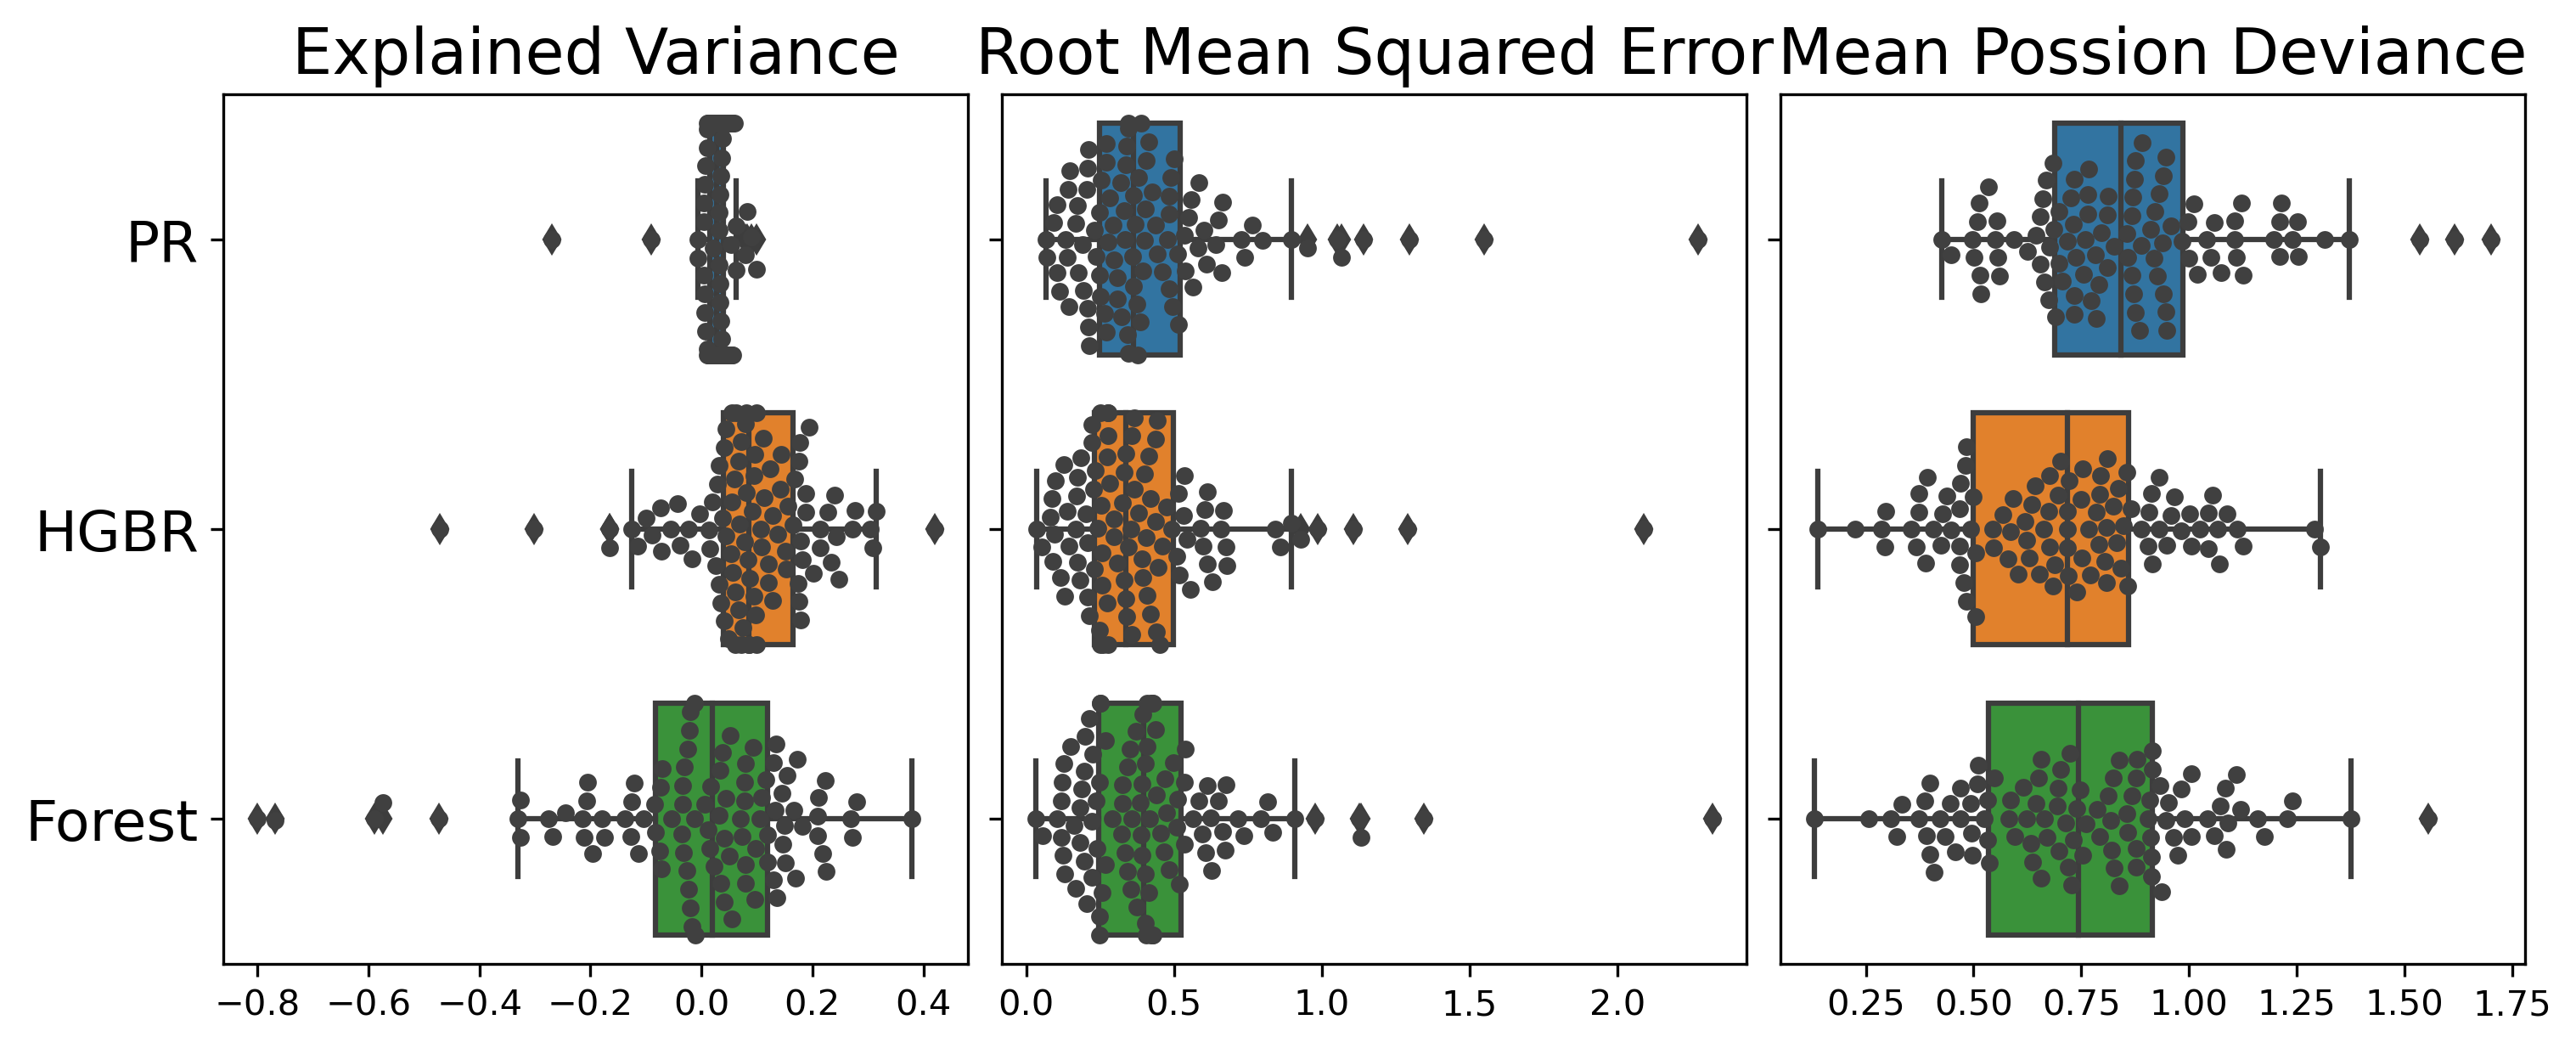

In [6]:
p_mod.plot_results(pr_results,HGBR_res,forest_res)
plt.show()


In [8]:
# p_mod.save_results(pr_results,)
# p_mod.save_results(HGBR_res)
# p_mod.save_results(forest_res)

### Neural net

In [9]:
X = p_mod.X
y = p_mod.y
y_log = np.log(p_mod.y)
all_features = p_mod.all_features
categorical_features = p_mod.categorical_features
numeric_features = p_mod.numeric_features

X = X[numeric_features]


# I'm not sure that it's appropriate to include both categorical and 
# numerical variables in the same model 
for e in categorical_features:
    s = pd.get_dummies(p_mod.X[e])
    X = pd.concat([X,s],axis=1)

In [10]:
input_shape = len(X.columns)

model = keras.Sequential(
    [
        # Input layer
        keras.Input(shape=input_shape),
        # Hidden layers\
        layers.Dense(100, activation="relu"),
        layers.Dense(50, activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="relu"),
        # output
        layers.Dense(1, 
                     activation="linear"
                     ),
        # layers.Dense(1)
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8,291
Trainable params: 8,291
Non-trainable params: 0
_________________________________________________________________


In [11]:

batch_size = 128
epochs = 100
model.compile(loss="mse", optimizer="Adam", metrics=[tf.keras.metrics.RootMeanSquaredError()])

hist = model.fit(X,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/100
109/109 [==============================] - 1s 3ms/step - loss: 23.9386 - root_mean_squared_error: 4.8927 - val_loss: 0.4357 - val_root_mean_squared_error: 0.6600
Epoch 2/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5012 - root_mean_squared_error: 0.7079 - val_loss: 0.4260 - val_root_mean_squared_error: 0.6527
Epoch 3/100
109/109 [==============================] - 0s 2ms/step - loss: 0.4906 - root_mean_squared_error: 0.7004 - val_loss: 0.4109 - val_root_mean_squared_error: 0.6410
Epoch 4/100
109/109 [==============================] - 0s 2ms/step - loss: 0.4826 - root_mean_squared_error: 0.6947 - val_loss: 0.4073 - val_root_mean_squared_error: 0.6382
Epoch 5/100
109/109 [==============================] - 0s 1ms/step - loss: 0.4788 - root_mean_squared_error: 0.6919 - val_loss: 0.4042 - val_root_mean_squared_error: 0.6358
Epoch 6/100
109/109 [==============================] - 0s 2ms/step - loss: 0.4742 - root_mean_squared_error: 0.6886 - val_loss: 0.4008

In [17]:
y_pred = model.predict(X)
y_pred[y_pred.argmin()]

481/481 [==============================] - 0s 603us/step


array([-0.13441932], dtype=float32)

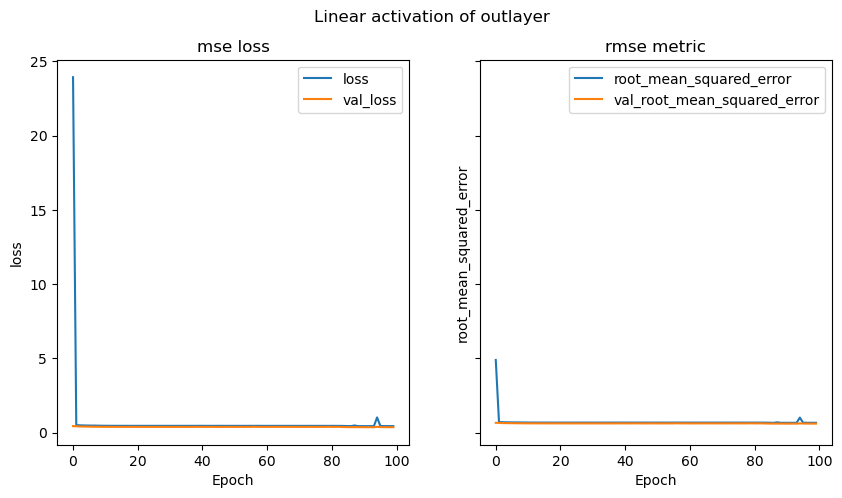

In [16]:

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,5))
fig.suptitle('Linear activation of outlayer')
ax1.set_title('mse loss')
ax2.set_title('rmse metric')
plotter(hist, 'loss', ax1)
plotter(hist, 'root_mean_squared_error', ax2)
plt.show()


